Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Azat Vakhitov | 12148222 | 09.01.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 &ndash; Your First Neural Networks</h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Schlüter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 05-12-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u5_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u5_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> When specifying a seed for the sources of randomness, use the <code>u5.set_seed(seed=XYZ)</code> function.
</div>

In [3]:
# Required packages and the u5_utils file
import u5_utils as u5
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

from scipy.special import expit as sigmoid

u5.check_module_versions()

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u5.setup_jupyter()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed scipy version: 1.7.3 (✓)
Installed torch version: 1.13.0 (✓)
Installed tqdm version: 4.64.0 (✓)


<h2>Exercise 1</h2>

Following the instructions given in the lecture notebook, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Create a dataset by sampling $100$ values for $x$ and computing $y = -0.5 - 2.35 \cdot x + 0.7 \cdot x^2$, then adding some noise (variance $0.45$) to $y$. For this, consider the function <code>get_dataset()</code> from <code>u5_utils.py</code>.</li>
        <li>For reproducibility, set a fixed seed (seed=22).</li>
    </ul>
</div>

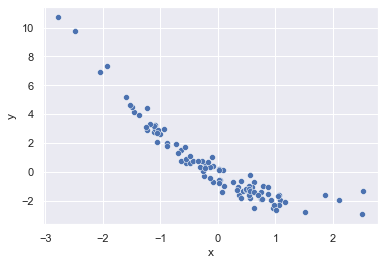

In [4]:
u5.set_seed(seed=22)
#𝑦=0.241+0.422⋅𝑥
# Generate dataset
dataset = u5.get_dataset(
    num_pairs=100,  # number of data points to create
    coefficients=(-0.5, -2.35, 0.7),  # coefficients for computing y from x
    variance=0.45  # variance of the noise of the observations
)

# Display the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 1.2. [3 Points]</b>
    <ul>
        <li>Define a model with three coefficients $b$, $w_1$ and $w_2$ of the form $\hat{y} = b + w_1 \cdot x + w_2 \cdot x^2$ (polynomial of degree $2$), with which we will approximate the relation between $x$ and $y$.</li>
    </ul>
</div>

In [5]:
def model(x, b, w1, w2):
    return b + x*(w1 + w2 * x)

<div class="alert alert-warning">
    <b>Exercise 1.3. [4 Points]</b>
    <ul>
        <li>Define <b>Mean Squared Error (MSE)</b> as the loss function.</li>
        <li>Using the most elegant method from the lecture, find the optimum $b$, $w_1$ and $w_2$ minimizing the loss and print out the loss.</li>
    </ul>
</div>

In [6]:
def loss(dataset, b, w1, w2):
    predictions = model(dataset.x.values, b, w1, w2)
    targets = dataset.y.values
    return np.mean((targets - predictions) ** 2, axis=-1)  


<div class="alert alert-warning">
    <b>Exercise 1.4. [2 Points]</b>
    <ul>
        <li>Plot the resulting linear model along with the data.</li>
    </ul>
</div>

-0.3316456762442286 -2.2787797381967336 0.6585162886230378


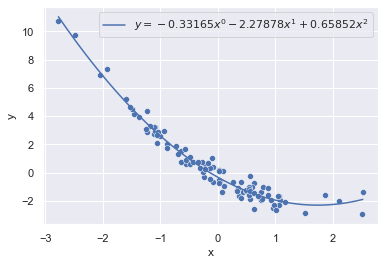

In [7]:
b, w1, w2 = np.polyfit(x=dataset.x, y=dataset.y, deg=2)[::-1]  # [::-1] is only done for consistency, since np.polyfit returns the coefficients starting with the highest power first
print(b, w1, w2)
loss(dataset, b, w1, w2)
u5.plot_model(dataset, (b, w1, w2))

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Exercise 2.1. [3 Points]</b>
    <ul>
        <li>Create a dataset with two variables, $x$ and $y$, where $y = 1$ for $x > 0.55$ and $y = 0$ otherwise. For this, use the function <code>get_dataset_logistic()</code> from <code>u5_utils.py</code>, with $100$ data points and variance $0.15$. Then, plot the dataset.</li>
        <li>For reproducibility, set a fixed seed (seed=22).</li>
    </ul>
</div>

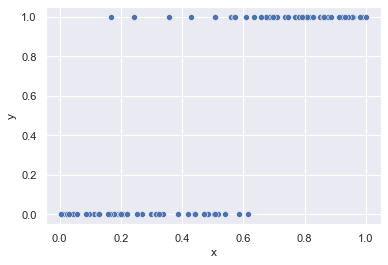

In [8]:
# Set seed for reproducibility.
u5.set_seed(seed=22)

# Create dataset consisting of random (x, y) pairs.
dataset = u5.get_dataset_logistic(
    num_pairs=100,   # number of data points
    threshold=0.55,  # position of class boundary
    variance=0.15    # amount of noise
)

# Display the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 2.2. [3 Points]</b>
    <ul>
        <li>Define a <b>logistic</b> model with two coefficients $b$ and $w$.</li>
    </ul>
</div>

In [9]:
def model(x, b, w):
    return sigmoid(b + w * x)

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Define a suitable loss and corresponding gradient function.</li>
    </ul>
</div>

In [10]:
def loss(dataset, b, w):
    predictions_before_sigmoid = b + w * dataset.x.values  # the unscaled output, also called "logits"
    targets = dataset.y.values
    return np.mean(np.maximum(predictions_before_sigmoid, 0)
                   - targets * predictions_before_sigmoid
                   + np.log1p(np.exp(-abs(predictions_before_sigmoid))),
                   axis=-1)
def loss_grad(dataset, b, w):
    predictions = model(dataset.x.values, b, w)
    targets = dataset.y.values
    delta = predictions - targets
    b_grad = np.mean(delta, axis=-1)
    w_grad = np.mean(dataset.x.values * delta, axis=-1)
    return b_grad, w_grad

<div class="alert alert-warning">
    <b>Exercise 2.4. [3 Points]</b>
    <ul>
        <li>Visualize the loss landscape <b>including the gradient arrows</b>. For this, use the function <code>plot_loss_landscape()</code> from <code>u5_utils.py</code> for $b$ and $w$ in a range from $-10$ to $10$ each.</li>
    </ul>
</div>

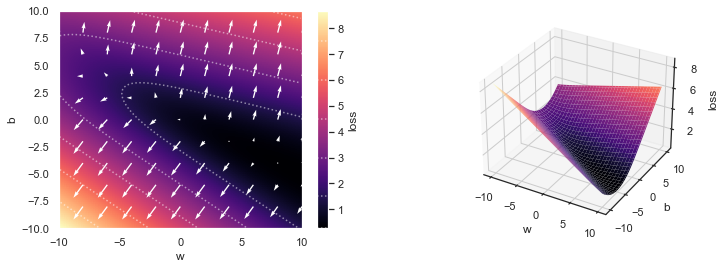

In [11]:
b_values = np.linspace(-10, 10, 101)
w_values = np.linspace(-10, 10, 101)
landscape = u5.plot_loss_landscape(loss, dataset, b=b_values, w=w_values, grad_fn=loss_grad)

<div class="alert alert-warning">
    <b>Exercise 2.5. [3 Points]</b>
    <ul>
        <li>Optimize the parameters $b$ and $w$ of the model using Gradient Descent. For this, use the function <code>plot_gradient_descent()</code> from <code>u5_utils.py</code>.</li>
        <li>As a starting point, use $b=7.5$, $w=3$, use $500$ iterations (steps), a step size (learning rate) of $0.9$ and a momentum of $0.0$.</li>
    </ul>
</div>

In [12]:
def gradient_descent(grad_fn, dataset, b, w, steps, stepsize):
    for _ in range(steps):
        b_grad, w_grad = grad_fn(dataset, b, w)
        b = b - stepsize * b_grad
        w = w - stepsize * w_grad
    return b, w
b, w = 7.5, 3  # starting point
steps = 500    # number of updates
stepsize = 0.9  # size of updates ("learning rate")


<div class="alert alert-warning">
    <b>Exercise 2.6. [2 Points]</b>
    <ul>
        <li>Print out the found, optimized values for $b$ and $w$ as well as the loss.</li>
    </ul>
</div>

Initial: b= 7.500000, w= 3.000000, loss= 4.138916
Final:   b=-4.524064, w= 9.017805, loss= 0.268032
Final: b=-4.524064, w= 9.017808, loss= 0.268032


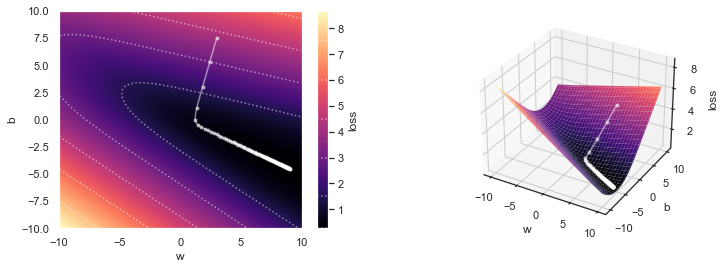

In [13]:
print(f"Initial: b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")
b, w = gradient_descent(loss_grad, dataset, b, w, steps, stepsize)
print(f"Final:   b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")
b, w = u5.plot_gradient_descent(
    loss, loss_grad, dataset,
    b=7.5, w=3,   # starting position
    steps=500,    # number of updates
    stepsize=0.9,  # learning rate
    momentum=0.0   # momentum term (between 0 and 1)
)

print(f"Final: b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")


<h2>Exercise 3</h2>

Continuing with the dataset and the logistic model from Exercise 2, we will now replace the loss function with the Mean Squared Error (MSE) loss to see what happens. Since we also need its gradient, we prepared this for you.

In [14]:
u5.set_seed(seed=22)
# MSE loss and gradient of MSE loss for a logistic model
def loss(dataset, b, w):
    predictions = model(dataset.x.values, b, w)
    targets = dataset.y.values
    return np.mean((predictions - targets)**2, axis=-1)

def loss_grad(dataset, b, w):
    predictions = model(dataset.x.values, b, w)
    targets = dataset.y.values
    delta = 2 * (predictions - targets)  # grad of (predictions - targets)**2
    delta *= predictions * (1 - predictions)  # grad of sigmoid()
    b_grad = np.mean(delta, axis=-1)
    w_grad = np.mean(dataset.x.values * delta, axis=-1)
    return b_grad, w_grad

<div class="alert alert-warning">
    <b>Exercise 3.1. [3 Points]</b>
    <ul>
        <li>Visualize the loss landscape <b>including the gradient arrows</b>. For this, use the function <code>plot_loss_landscape()</code> from <code>u5_utils.py</code>, for $b$ and $w$ in a range from $-10$ to $10$ each.</li>
    </ul>
</div>

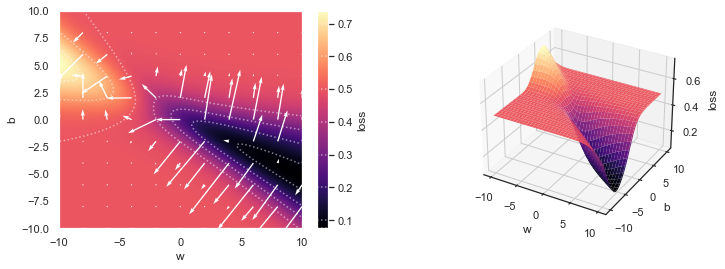

In [15]:
b_values = np.linspace(-10, 10, 101)
w_values = np.linspace(-10, 10, 101)
landscape = u5.plot_loss_landscape(loss, dataset, b=b_values, w=w_values, grad_fn=loss_grad)

<div class="alert alert-warning">
    <b>Exercise 3.2. [3 Points]</b>
    <ul>
        <li>Optimize the parameters $b$ and $w$ of the model using Gradient Descent. Again, use the function <code>plot_gradient_descent()</code> from <code>u5_utils.py</code> to perform the optimization.</li>
        <li>Again, start from $b=7.5$, $w=3$, do $500$ iterations (steps), use a step size (learning rate) of $0.9$ and a momentum of $0.0$.</li>
    </ul>
</div>

In [16]:
b, w = 7.5, 3  # starting point
steps = 500    # number of updates
stepsize = 0.9  # size of updates ("learning rate")
print(f"Initial: b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")
b, w = gradient_descent(loss_grad, dataset, b, w, steps, stepsize)


Initial: b= 7.500000, w= 3.000000, loss= 0.499711


<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>Print out the found, optimized values for $b$ and $w$ as well as the loss.</li>
    </ul>
</div>

In [17]:
print(f"Final:   b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")

Final:   b= 7.360710, w= 2.975127, loss= 0.499667


<div class="alert alert-warning">
    <b>Exercise 3.4. [3 Points]</b>
    <ul>
        <li>Redo the optimization but change the starting position for $b$ and $w$ such that it finds a loss smaller than $0.1$.
        <li>Hint: Look at the loss landscape to pick the position. Remember that gradient descent can be compared to a ball rolling down a hill.</li>
    </ul>
</div>

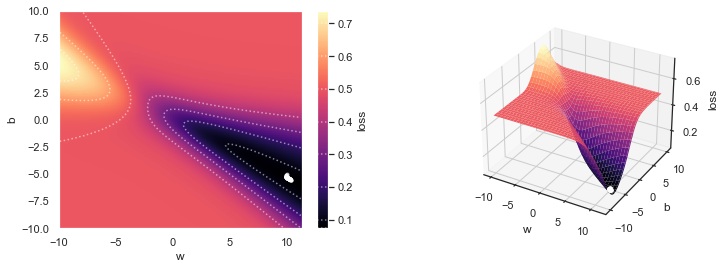

In [18]:
b, w = u5.plot_gradient_descent(
    loss, loss_grad, dataset,
    b=-5, w=10,   # starting position
    steps=500,    # number of updates
    stepsize=0.9,  # learning rate
    momentum=0.0   # momentum term (between 0 and 1)
)
# b, w = 7.5, 3  # starting point
# steps = 500    # number of updates
# stepsize = 0.9  # size of updates ("learning rate")



<div class="alert alert-warning">
    <b>Exercise 3.5. [2 Points]</b>
    <ul>
        <li>Print out the found, optimized values for $b$ and $w$ as well as the loss.</li>
    </ul>
</div>

In [19]:
print(f"Final: b={b:9f}, w={w:9f}, loss={loss(dataset, b, w):9f}")

Final: b=-5.524541, w=10.332548, loss= 0.075061


<h2>Exercise 4</h2>

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Considering again the dataset from Exercises 2 and 3, implement a logistic regression model in <code>PyTorch</code> and define a suitable loss function and a gradient descent optimizer.</li>
        <li>For the optimizer, set learning rate = $0.15$ and momentum = $0.0$.</li>
        <li>For reproducibility, set a fixed seed (seed=22).</li>
    </ul>
</div>

In [20]:
u5.set_seed(seed=22)

torched_data = torch.tensor(dataset.x.values, requires_grad=True)

model = torch.nn.Linear(1, 1)
X = torch.as_tensor(dataset[["x"]].values)
Y = torch.as_tensor(dataset[["y"]].values)

loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(
    model.parameters(),  # the model parameters to train
    lr=0.15,              # the step size/learning rate
    momentum=0.0,        # and the momentum
)

<div class="alert alert-warning">
    <b>Exercise 4.2. [7 Points]</b>
    <ul>
        <li>Run the optimization (get predictions, calculate loss, compute loss gradient, perform update step) until the loss is $\leq 0.3$.</li>
        <li>Print out the final loss as well as the initial (randomly chosen) $b$ (bias) and $w$ (weight) and those achieved after optimization.</li>
        <li>Hint: Follow the lecture notebook to convert the input data and target to torch tensors for the optimization.</li>
    </ul>
</div>

Initial: b= 0.405045, w=-0.268205, loss= 0.735044
Final:   b=-3.963716, w= 7.952763, loss= 0.277967


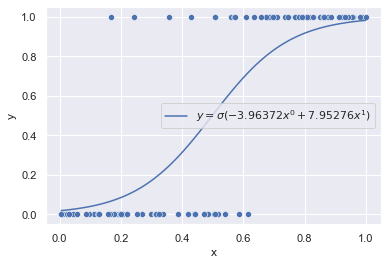

In [21]:
b, w = model.bias.item(), model.weight.item()
error = loss(model(X), Y)
print(f"Initial: b={b:9f}, w={w:9f}, loss={error.item():9f}")

for _ in range(2000):  # number of updates
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration

b, w = model.bias.item(), model.weight.item()
print(f"Final:   b={b:9f}, w={w:9f}, loss={error.item():9f}")
u5.plot_model(dataset, (b, w), transform=sigmoid)

<h2>Exercise 5</h2>

With the dataset defined and plotted below (as given in the next code cell), perform the following tasks:

           x1        x2    y
0   -0.091950  0.342828  1.0
1   -1.463351 -0.990135  0.0
2    1.081792  0.997037  1.0
3   -0.239325  0.138554  0.0
4   -0.491129  1.508382  0.0
..        ...       ...  ...
695  0.742186 -1.499596  0.0
696 -0.815083 -0.814687  0.0
697  0.572398 -1.172055  0.0
698  1.279779 -1.262888  0.0
699 -0.332065  0.167394  0.0

[700 rows x 3 columns]


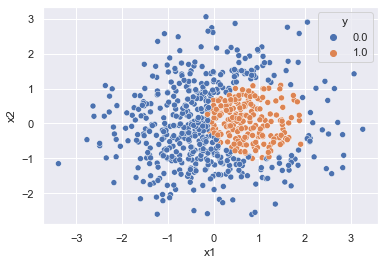

In [22]:
# set seed for reproducibility
u5.set_seed(seed=22)

# create dataset consisting of random (x, y) pairs
dataset = u5.get_dataset_blob2d(
    num_samples=700,  # number of data points to create
    variance=0.05,    # variance of the noise of the observations    
    threshold=1.1,    # radius of the circle for class 1
    offset=(1, 0.1),  # center of the circle
)

# display the dataset
sns.scatterplot(data=dataset, x="x1", y="x2", hue="y")
print(dataset)

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=22).
</div>

<div class="alert alert-warning">
    <b>Exercise 5.1. [7 Points]</b>
    <ul>
        <li>Implement a similar model as in Exercise 4, i.e., a logistic regression model in <code>PyTorch</code>, considering Binary Cross-Entropy (BCE) as the loss funtion and Gradient Descent as the optimization method.</li>
        <li>For the optimization, set learning rate = $0.15$ and momentum = $0.9$. Then, run the optimization for $4000$ steps and print out the loss.</li>
        <li>Hint: This dataset is two-dimensional, i.e., it has $2$ input features called "x1" and "x2". They need to be combined into a single torch tensor for the optimization. You can concatenate two torch vectors into a matrix with <a href="https://pytorch.org/docs/stable/generated/torch.stack.html#torch.stack"><code>torch.stack(..., dim=1)</code></a>, or you can directly assign the entire feature vector matrix <code>dataset[["x1", "x2"]].values</code> to a tensor.</li>
        <li>Hint: Your model will now need $2$ input nodes to handle $2$ features but still $1$ output node for binary classification.</li>
    </ul>
</div>

In [29]:
u5.set_seed(seed=22)

model = torch.nn.Linear(2, 1)
Y = torch.as_tensor(dataset[["y"]].values)
X = torch.as_tensor(dataset[["x1", "x2"]].values) #torch.stack((x1,x2), dim=1)

loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(
    model.parameters(),  # the model parameters to train
    lr=0.15,              # the step size/learning rate
    momentum=0.9,        # and the momentum
)

error = loss(model(X), Y)

for _ in range(4000):  # number of updates
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration
print(f"Final: loss={error.item():9f}")


Final: loss= 0.507922


<div class="alert alert-warning">
    <b>Important:</b> Display the predictions to answer the following questions. The following code assumes that the predictions from above are stored into a variable called <code>preds</code>. Adapt this if needed (or simply name your predictions above to <code>preds</code>).
</div>

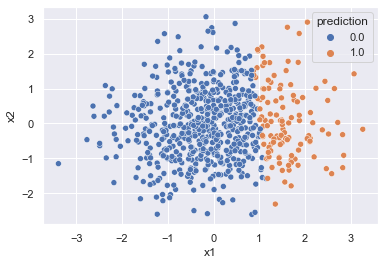

In [30]:
dataset["prediction"] = (preds.detach().sigmoid().numpy() > 0.5).astype(float)
sns.scatterplot(data=dataset, x="x1", y="x2", hue="prediction");

<div class="alert alert-warning">
    <b>Exercise 5.2. [2 Points]</b>
    <ul>
        <li>Does the model manage to separate the 2 classes?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 5.3. [2 Points]</b>
    <ul>
        <li>Does it look like it tried to separate them with a straight line?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 5.4. [7 Points]</b>
    <ul>
        <li>Implement a more complex model by adding a hidden layer with two nodes (the loss function and the Gradient Descent optimizer parameters remain the same).</li>
        <li>Run the optimization for $4000$ steps, print out the loss and visualize the predictions of the model with the code provided by us.</li>
        <li>Increase the number of nodes in the hidden layer, retrain the model and visualize the predictions until the classes are separated properly.</li>
    </ul>
</div>

In [37]:
u5.set_seed(seed=22)

# Create model here again to ensure that the random parameter initialization is reproducible.
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(2, 2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(2, 1)
)
Y = torch.as_tensor(dataset[["y"]].values)
X = torch.as_tensor(dataset[["x1", "x2"]].values) #torch.stack((x1,x2), dim=1)



loss = torch.nn.functional.binary_cross_entropy_with_logits
optimizer = torch.optim.SGD(
    model.parameters(),  # the model parameters to train
    lr=0.15,              # the step size/learning rate
    momentum=0.9,        # and the momentum
)

error = loss(model(X), Y)

for _ in range(4000):  # number of updates
    preds = model(X)        # compute predictions
    error = loss(preds, Y)  # compute error
    error.backward()        # compute gradient of the error
    optimizer.step()        # perform update step
    optimizer.zero_grad()   # reset gradients for the next iteration

print(f"Final: loss={error.item():9f}")

Final: loss= 0.237051


<div class="alert alert-warning">
    <b>Important:</b> Display the predictions with the more complex model. The following code assumes that the predictions from above are stored into a variable called <code>preds</code>. Adapt this if needed (or simply name your predictions above to <code>preds</code>).
    Repeat step <b>5.4.</b> until the model properly separates the two classes (a visual check is sufficient).
</div>

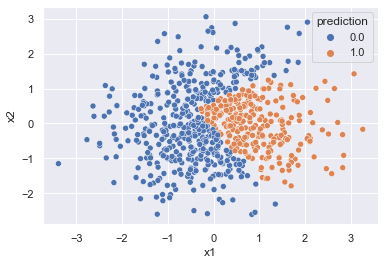

In [38]:
dataset["prediction"] = (preds.detach().sigmoid().numpy() > 0.5).astype(float)
sns.scatterplot(data=dataset, x="x1", y="x2", hue="prediction");

<h2>Exercise 6</h2>

Following the instruction given in the lecture notebook, perform the following tasks, but this time, considering the <b>Fashion-MNIST</b> dataset. More information about the dataset can be found in this publication:

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf (2017). [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

To load the Fashion-MNIST dataset and take a look at a preview of $5$ samples, run the cell below (provided by us).

**Important:** The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored.

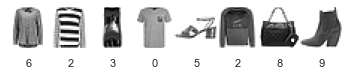

In [39]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u5.get_dataset_mnist(
    root="resources",
    variant="FashionMNIST",
    batch_size=8,
    valid_size=0.10
)

# load the first batch of data (set seed for reproducibility)
u5.set_seed(seed=22)
images, labels = next(iter(train_loader))
# transform the image shapes for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=1)

# display the first batch of data
with plt.style.context({"axes.grid": False, "xtick.bottom": False}):
    plt.imshow(images, cmap="binary")
    plt.xticks(14 + np.arange(len(labels)) * 28, labels.numpy())
    plt.yticks([])

<div class="alert alert-warning">
    <b>Exercise 6.1. [4 Points]</b>
    <ul>
        <li>Like the MNIST dataset, the Fashion-MNIST has input images of $28 \times 28 = 784$ pixels and $10$ classes. Considering this, define a Neural Network model with one hidden layer consisting of $16$ nodes.</li>
        <li>For reproducibility, set a fixed seed (seed=22).</li>
    </ul>
</div>

In [44]:
u5.set_seed(22)
loss = torch.nn.functional.cross_entropy

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 16),
    torch.nn.Sigmoid(),
    torch.nn.Linear(16, 10)
)

torch.Size([16, 16])
torch.Size([16])
torch.Size([10, 784])
torch.Size([10])
Total count: 8122


<div class="alert alert-warning">
    <b>Exercise 6.2. [7 Points]</b>
    <ul>
        <li>Reload the dataset considering $20\%$ of the samples as validation set and train the model with the following hyperparameters: batch size = $32$, iterations = $4$, momentum = $0.9$ and learning rate = $0.05$. Use the function <code>run_gradient_descent()</code> from <code>u5_utils.py</code>.</li>
        <li>For reproducibility, set a fixed seed (seed=22) before the running optimization.</li>
    </ul>
</div>

In [45]:
u5.set_seed(22)
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u5.get_dataset_mnist(
    root="resources",
    variant="FashionMNIST",
    batch_size=32,
    valid_size=0.20
)
losses = u5.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    iterations=4,        # number of iterations/epochs over the training set
    learning_rate=0.05,  # step size/learning rate
    momentum=0.9         # momentum
)

  0%|          | 0/48000 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.613856
Epoch  2 finished with training loss: 0.492137
Epoch  3 finished with training loss: 0.463057
Epoch  4 finished with training loss: 0.446588


<div class="alert alert-warning">
    <b>Exercise 6.3. [3 Points]</b>
    <ul>
        <li>Plot the training and validation losses and print out the accuracy on the test set.</li>
    </ul>
</div>

Training set:
{'loss': 0.43776262909173963, 'accuracy': 0.8419583333333334}
Test set:
{'loss': 0.48647440467684416, 'accuracy': 0.8261781150159745}


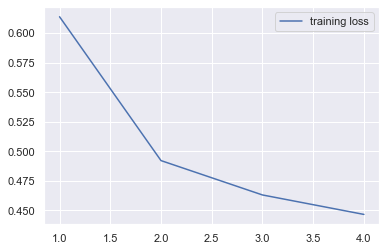

In [47]:
sns.lineplot(data=losses);
print("Training set:")
print(u5.evaluate_model(model, train_loader, loss=loss, accuracy=u5.multiclass_accuracy))
print("Test set:")
print(u5.evaluate_model(model, test_loader, loss=loss, accuracy=u5.multiclass_accuracy))

<div class="alert alert-warning">
    <b>Exercise 6.4. [13 Points]</b>
    <ul>
        <li>Keeping the partitioning as before, can you optimize the model in order to achieve an accuracy on the test set > $86\%$ (there are various ways to achieve this)? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on test to show that it is better than $86\%$.</li>
        <li>For reproducibility, set a fixed seed (seed=22). It must be set both before defining the model and before the optimization (in which random samples are drawn). Otherwise, changes in the model would change the train/validation split samples, since both steps use randomization.</li>
        <li>Hint: For optimization, vary the following hyperparameters: batch size, iterations, learning rate, momentum, number of layers, number of nodes and type of non-linearity. You may also try randomly flipping training images to perform data augmentation (provided by <code>get_dataset_mnist()</code>). Do <b>not</b> vary the validation set size, as that would increase the training set size.</li>
    </ul>
</div>

In [ ]:
# your code goes here